In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load the dataset
data = pd.read_csv("House_Rent_Dataset.csv")

In [7]:
data.shape

(4746, 12)

In [8]:
data.sample(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3657,2022-06-30,2,11000,800,1 out of 2,Super Area,"Narayanapuram, Kovilambakkam",Chennai,Semi-Furnished,Family,2,Contact Owner
508,2022-05-12,1,5000,450,Ground out of 1,Super Area,"Siriti, Tollygunge",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2504,2022-04-29,2,9000,60,1 out of 3,Super Area,Mehrauli,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner
941,2022-05-10,3,32000,1200,4 out of 5,Super Area,"Ishwardas Bhuvan CHS, Kandivali East",Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Owner
3960,2022-05-12,1,8000,300,4 out of 4,Super Area,"Mallepally, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,1,Contact Owner
2176,2022-05-14,3,30000,2000,1 out of 1,Super Area,"Jp Nagar Phase 6, J P Nagar, Outer Ring Road",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner


In [9]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [11]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [14]:
#drop the columns not required
#axis = 1 means we are dropping columns
#axis =0 means we are dropping rows
data = data.drop(['Posted On', 'Area Locality'],axis=1)

In [15]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [16]:
data.shape

(4746, 10)

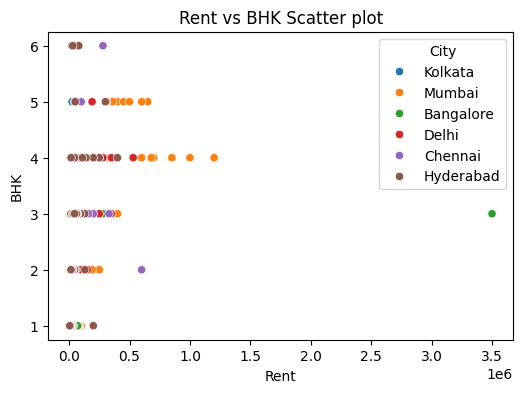

In [17]:
#SCATTER PLOT
plt.figure(figsize = (6,4))
sns.scatterplot(x = "Rent" , y = "BHK", hue = "City" , data = data)
plt.title("Rent vs BHK Scatter plot")
plt.show()

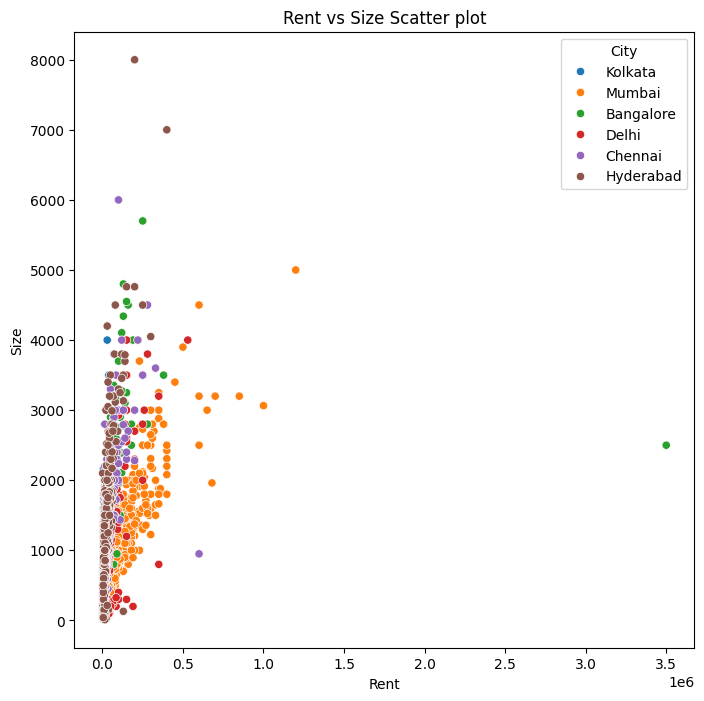

In [18]:
#SCATTER PLOT
plt.figure(figsize = (8,8))
sns.scatterplot(x = "Rent" , y = "Size", hue = "City" , data = data)
plt.title("Rent vs Size Scatter plot")
plt.show()

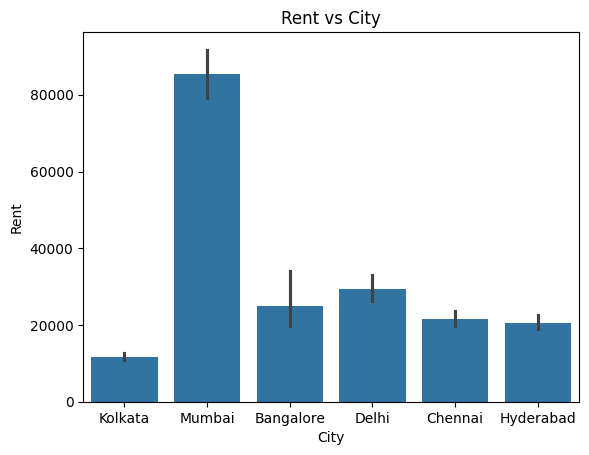

In [19]:
#Rent by city
sns.barplot(x = "City", y = "Rent", data = data)
plt.title("Rent vs City")
plt.show()

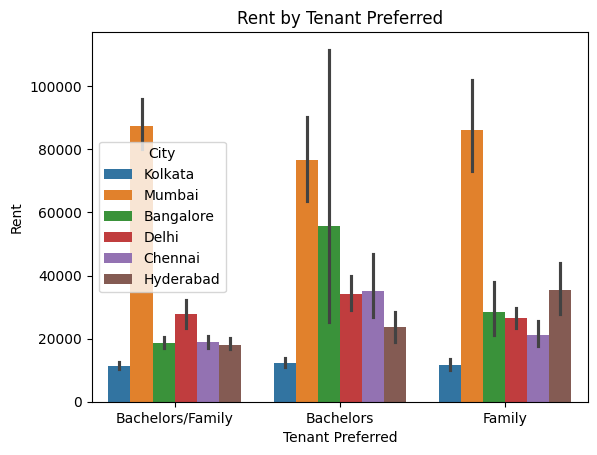

In [20]:
sns.barplot(x = "Tenant Preferred", y = "Rent", hue = "City" , data = data)
plt.title("Rent by Tenant Preferred")
plt.show()

#Data Processing and Splitting


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [22]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols


Index(['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [23]:
for col in categorical_cols:
    print(f"{col} : {data[col].nunique()}")

Floor : 480
Area Type : 3
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3


In [24]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [25]:
x = data.drop(columns="Rent")
y = data["Rent"]

In [26]:
x.head()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [27]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [43]:
#encoder leaveonehotencoder
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x, y)



In [29]:
x.head()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,14164.719198,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,17947.602740,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,17957.876712,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,14458.465608,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,14465.079365,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [31]:
x_df = pd.DataFrame(x)

In [32]:
x_df.head()

,0,1,2,3,4,5,6,7,8
0,-0.100773,0.208960,-0.561400,-0.968207,-0.899659,-1.096256,-0.584197,0.038594,-0.689511
1,-0.100773,-0.264125,-0.435608,-0.968450,-0.900396,0.326793,-0.584646,-1.092067,-0.689628
2,-0.100773,0.051265,-0.435267,-0.968377,-0.900175,0.326910,-0.584512,-1.092067,-0.689593
3,-0.100773,-0.264125,-0.551632,-0.968207,-0.899659,-1.096256,-0.584197,-1.092067,-0.689511
4,-0.100773,-0.185277,-0.551412,1.033212,-0.899475,-1.096135,1.112571,-1.092067,-0.689482


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [34]:
x_train.shape

(3796, 9)

In [35]:
x_test.shape

(950, 9)

In [36]:
x_test.shape , y_test.shape

((950, 9), (950,))

##Training Models and Evaluation of Linear Regression, Random Forest, Decison Tree

In [37]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
models = [model_rfr, model_dt, model_lr]

In [38]:
for model in models:
    print(f"Training {model}")
    model.fit(x_train , y_train)

Training RandomForestRegressor()
Training DecisionTreeRegressor()
Training LinearRegression()


In [39]:
for model in models:
    print(f"score of {model} is : {model.score(x_test, y_test)}")

score of RandomForestRegressor() is : 0.9342161083856659
score of DecisionTreeRegressor() is : 0.9360539896864016
score of LinearRegression() is : 0.5142769868268966


In [42]:
new_data=pd.DataFrame(
    {
    'BHK' : [3],
    'Size' : [1500],
    'Area Type':['Super Area'],
    'City':['Kolkata'], 
    'Furnishing Status':['Furnished'],
    'Tenant Preferred':['Family'],
    'Bathroom':[2],
    'Point of Contact':['Contact Owner']
    }
    )
new_data_encoder = encoder.transform(new_data)
new_data_scaled = scaler.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]}")

ValueError: Unexpected input dimension 8, expected 9

#Deployment


In [ ]:
import pickle

#save model
pickle.dump(model_rfr, open("rent_model.pkl","wb"))

#save encoder
pickle.dump(encoder, open("encoder.pkl","wb"))

#save scaler
pickle.dump(scaler, open("scaler.pkl","wb"))

print("Model, Encoder & Scaler saved successfully!")

NameError: name 'encoder' is not defined

In [44]:
import pickle

#save model
pickle.dump(model_rfr, open("rent_model.pkl","wb"))

#save encoder
pickle.dump(encoder, open("encoder.pkl","wb"))

#save scaler
pickle.dump(scaler, open("scaler.pkl","wb"))

print("Model, Encoder & Scaler saved successfully!")

Model, Encoder & Scaler saved successfully!
